Exploring different regularization techniques for machine learning to overcome overfitting issue using both Scikit-Learn for ML projects and PyTorch for deep learning projects.

Some useful terms:
* Underfitting - Doesn't fit the training set well (**high bias**). It can also be indicated from the high training and CV loss obtained during the model training.
* Generalization - Fits training set pretty well.
* Overfit: Fits the training set extremely well (**high variance**). It can also be indicated from the low training loss and high CV loss obtained during the model training.

One simple way to address overfitting in machine learning is:
* Through collecting more training data.
* `Feature Selection` to include/exclude. Many features with insufficient data will result in overfitting. Feature selection has some disadvantages as the algorithm is excluding some features that could have meaningful information or proportional to the output.
* Regularization: gentely reducing some features impact (thus reducing size of parameters) by restricting them without directly eliminating them by setting them equal to zero (as what happens in feature selection), therefor keeping all features with some having smaller effect. Note that it is usually not encouraged to minimize the `bias  (b)` using regularization.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### How to tell if an algorithm has a high bias or variance?

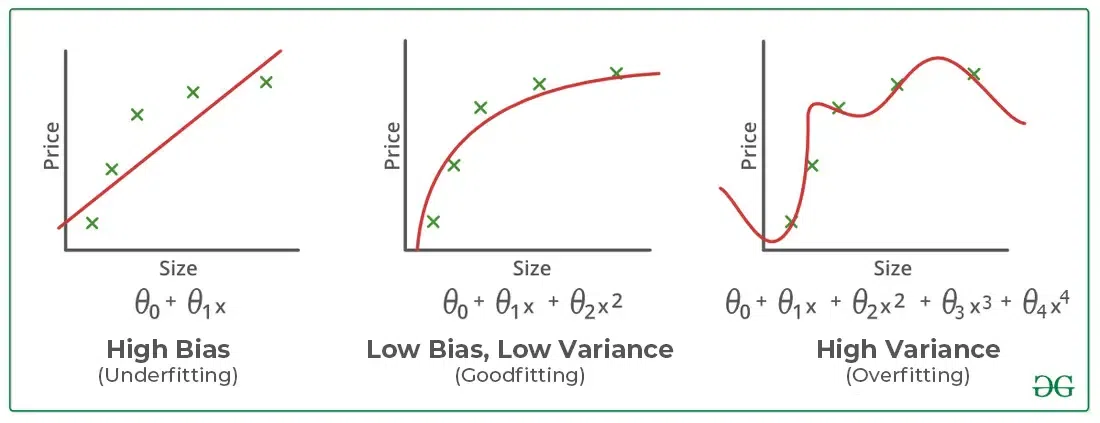

* High bias (underfit): Train loss will be high, validation/cross-validation loss will be almost equal to the train loss.
* High variance (overfit): Validation/Cross-validation loss will be higher than the train loss, as train loss may be low.
* High bias and variance: Train loss will be high, and validation/cross-validation loss will be higher than the train loss.

#### Helpers

The `sigmoid` function:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [17]:
# Sigmoid in numpy
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

#### Theory

##### Cost function for regularized linear regression

The equation for the cost function regularized **linear** regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization, which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [1]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [3]:
# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


##### Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice. 

In [18]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [19]:
# Testing
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


##### Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

##### Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

<b>Gradient function for regularized linear regression</b>

In [20]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [21]:
# Test
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


<b>Gradient function for regularized logistic regression</b>

In [22]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  


In [23]:
# Test
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


#### Different types of regularization techniques

##### ℓ₂ (Ridge) Regularization / Weight Decay
Similar to the implemented examples above for linear and logistic regressions, it adds a penalty proportional to the square of each weight → discourages large weights, yielding smoother functions.

$Loss = Error(Y - \widehat{Y}) +  \lambda \sum_1^n w_i^{2}$

From `scikit-learn` documentation:

```python

Parameters: 

1. penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
    Specify the norm of the penalty:
    * None: no penalty is added;
    * 'l2': add a L2 penalty term and it is the default choice;
    * 'l1': add a L1 penalty term;
    * 'elasticnet': both L1 and L2 penalty terms are added.
        
    Some penalties may not work with some solvers. See the parameter solver in the documentation, to know the compatibility between the penalty and solver.

2. Cfloat, default=1.0
    Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
```

In [24]:
# In scikit‑learn (e.g. logistic regression)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)

(1000, 20) (1000,)
(750, 20) (750,)


In [27]:
# C = 1/λ; smaller C → stronger ℓ₂ penalty
model_no_reg = LogisticRegression(penalty=None, solver='saga', max_iter=10000).fit(X_train, y_train)
model_l2    = LogisticRegression(penalty='l2', C=1.0,    solver='saga', max_iter=10000).fit(X_train, y_train)

In [28]:
print("No reg acc:",  accuracy_score(y_val, model_no_reg.predict(X_val)))
print("L2   reg acc:", accuracy_score(y_val, model_l2   .predict(X_val)))

No reg acc: 0.968
L2   reg acc: 0.968


From Pytorch, some optimizers have built in weight_decay, as `optim.SGD` below:

In [29]:
import torch, torch.nn as nn, torch.optim as optim

model = nn.Sequential(
    nn.Linear(20, 50),
    nn.ReLU(),
    nn.Linear(50, 2)
)

criterion = nn.CrossEntropyLoss()

# weight_decay is λ
opt_no_decay = optim.SGD(model.parameters(), lr=1e-2, weight_decay=0.0)
opt_decay    = optim.SGD(model.parameters(), lr=1e-2, weight_decay=1e-3)

##### ℓ₁ (Lasso) Regularization
Adds a penalty proportional to the absolute value of weights → yields sparse solutions (many weights zero). L1 Regularization technique is called LASSO (Least Absolute Shrinkage and Selection Operator) regression. It adds the absolute value of magnitude of the coefficient as a penalty term to the loss function(L). This penalty can shrink some coefficients to zero which helps in selecting only the important features and ignoring the less important ones.

$Loss = Error(Y - \widehat{Y}) + \lambda \sum_1^n |w_i|$

Using `scikit-learn`, we can directly use the l1 penalty in the model

In [30]:
# solver='saga' supports l1 penalty
model_l1 = LogisticRegression(penalty='l1', C=0.5, solver='saga', max_iter=10000).fit(X_train, y_train)

print("L1   reg acc:", accuracy_score(y_val, model_l1.predict(X_val)))

# inspect sparsity
print("Number of zero weights:", (model_l1.coef_ == 0).sum())

L1   reg acc: 0.968
Number of zero weights: 3


PyTorch doesn't support a built-in L1 regularization, so we can implement it in the training loop as followin:

```python

lambda_l1 = 1e-4

for X_batch, y_batch in train_loader:
    logits = model(X_batch)
    loss   = criterion(logits, y_batch)
    
    # ℓ1 penalty
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    loss   += lambda_l1 * l1_norm

    opt.zero_grad()
    loss.backward()
    opt.step()

```

##### Dropout Layer

Randomly zeroes a fraction p of activations each forward pass during training; at test time, uses all activations scaled appropriately. This prevents co‑adaptation of neurons. Dropout usually slows convergence slightly but reduces overfitting (training vs. validation gap).

In [32]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),   # 50% dropout
            nn.Linear(256, 10)
        )
    def forward(self, x):
        return self.net(x)

model = NetWithDropout()

##### Early Stopping

During training, monitor validation loss (or accuracy) and stop when it hasn’t improved for k epochs, then roll back to the best weights. For PyTorch, use a custom made EarlyStopping class.

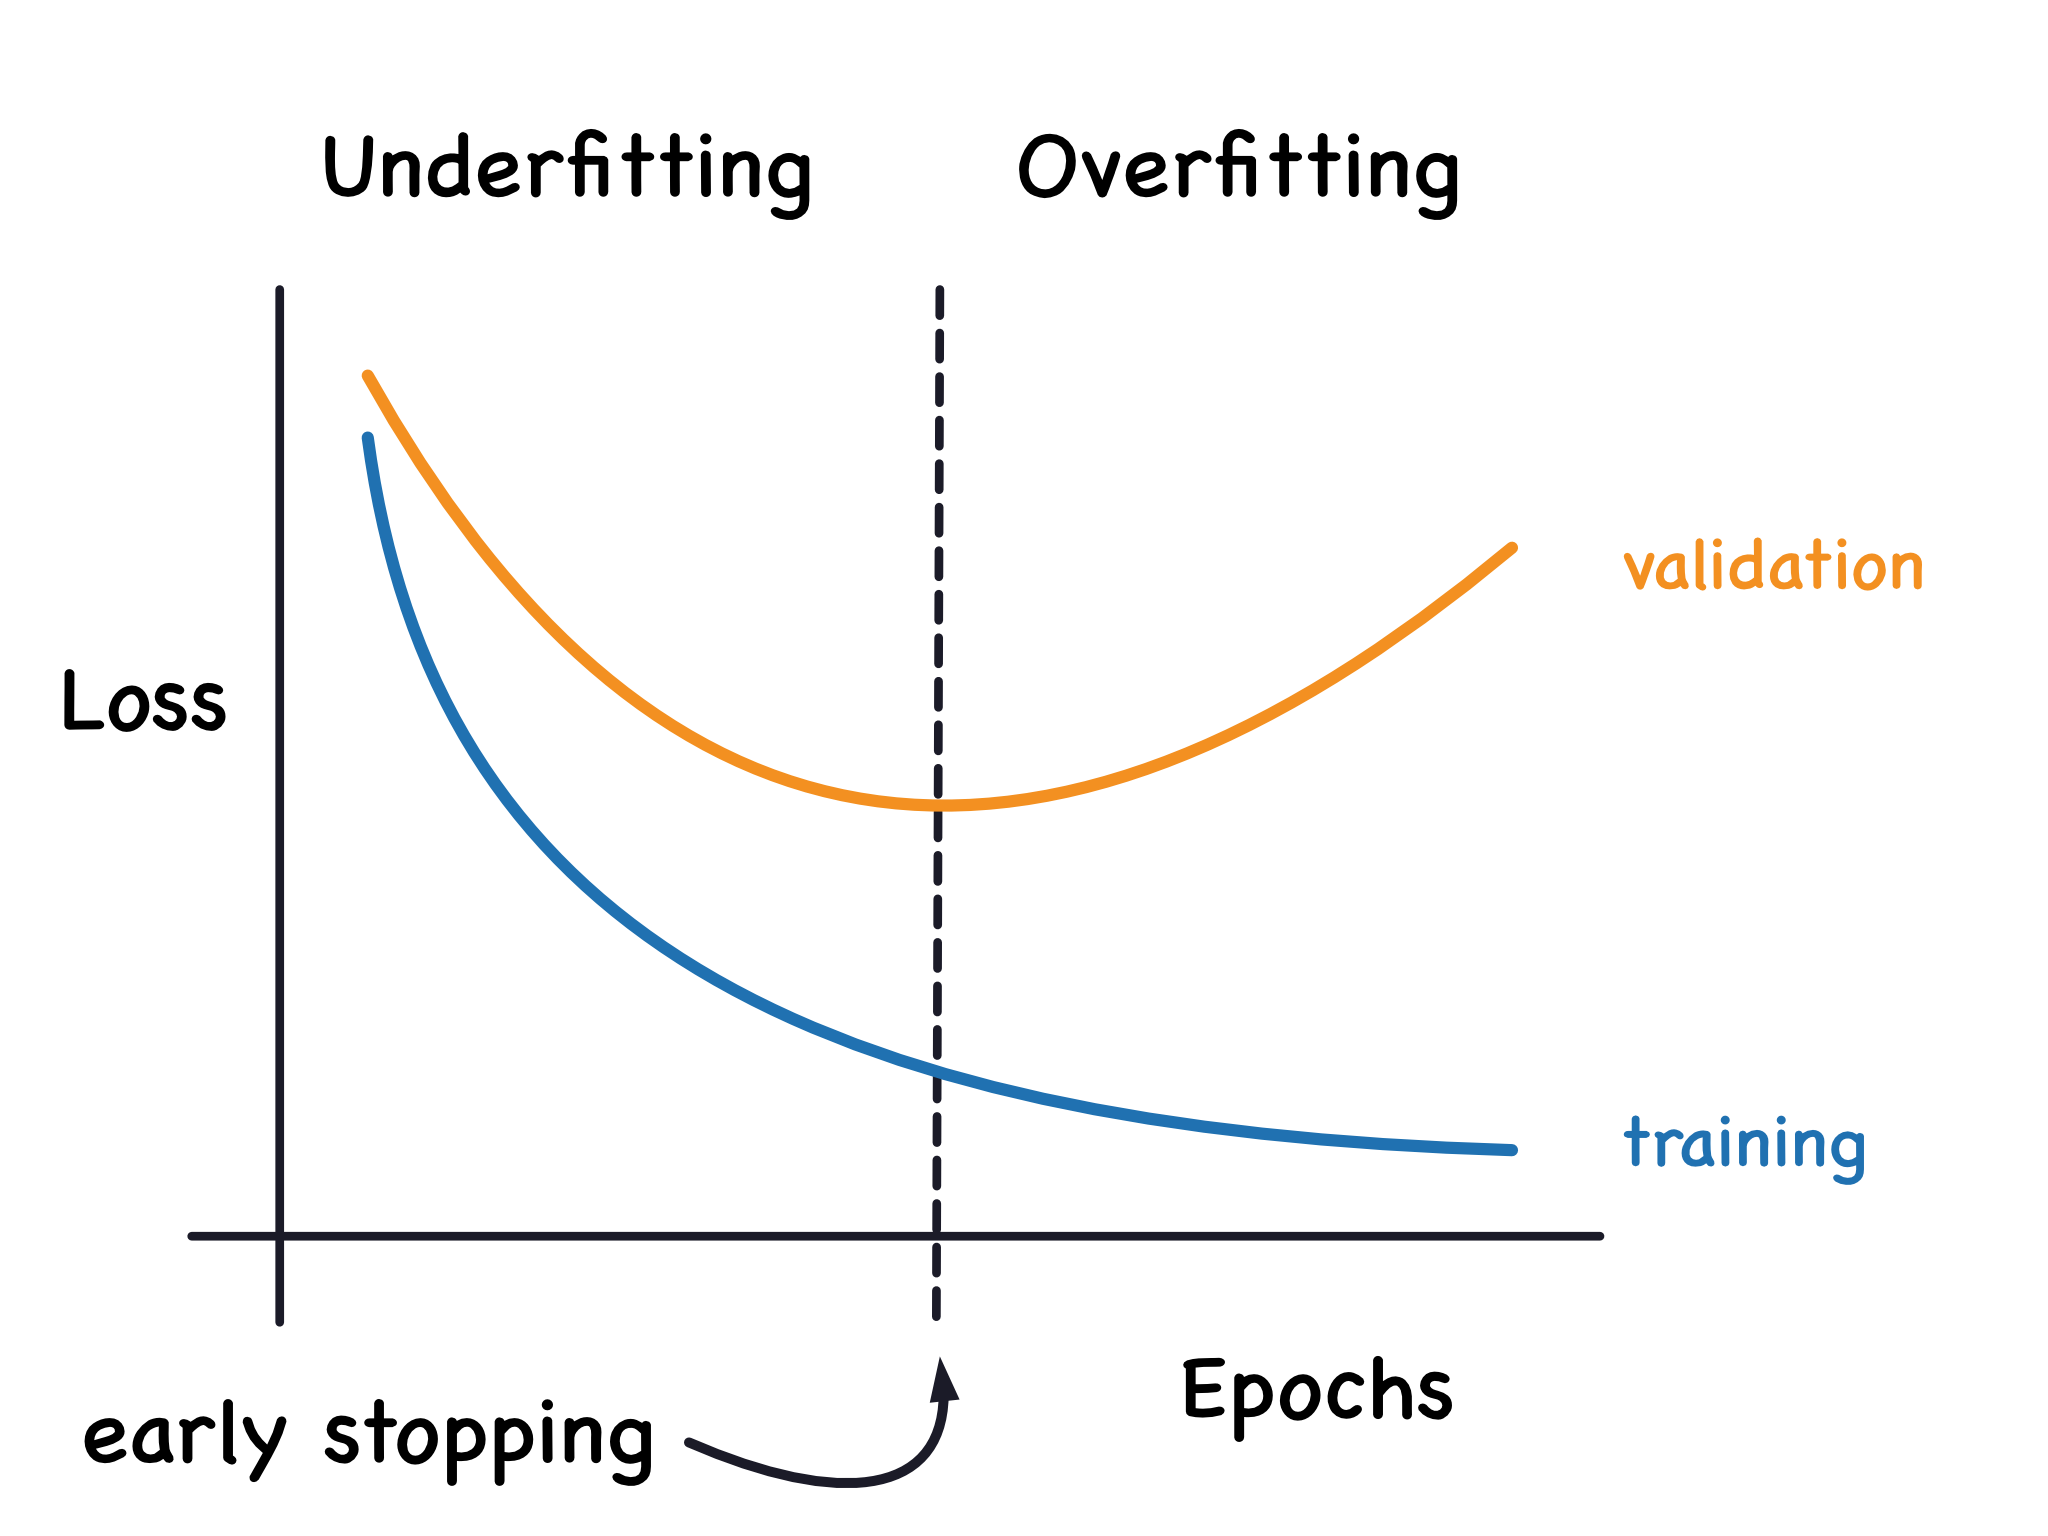

#### Choosing the regularization parameter $\lambda$

A high value of λ (lambda) leads to strong regularization, pushing model parameters closer to zero. This can cause underfitting, resulting in high bias and larger training loss.

In contrast, a low λ (e.g., λ = 0) applies little to no regularization, allowing the model to fit the training data too closely. This often leads to overfitting, characterized by low training loss but high validation loss.

A good practice is to find the intermadiate λ that balances both train and validation loss, in the practice of cross-validation when performing regularization.

Thus, we can try with:
* λ = 0 -> ...
* λ = 0.01 -> ...
* λ = 0.02 -> ...
* λ = 0.04 -> ...
* λ = 0.08 -> ...
* ...
* λ = 10 -> ...

This will end up in 12 trys. After that, we can pick the best regularization parameter value that yield the best loss values and model parameters.

**If the learning algorithm suffers from high bias, getting more training data will not (by itself) help much (decreasing the regularization parameter might improve or adding more features). If a learning algorithm suffers from high variance, getting more training data is likely to help (or increasing the regularization parameter).**

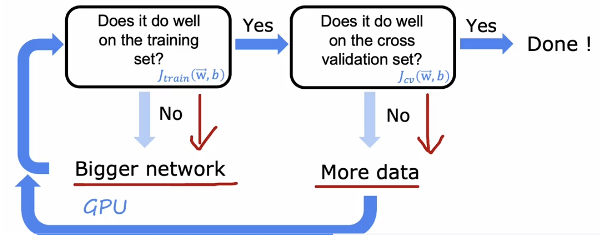